# 5. K-Means

## K-평균 실습 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [3]:
X = dataset.iloc[:, :].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화(전체 데이터 분포 확인)

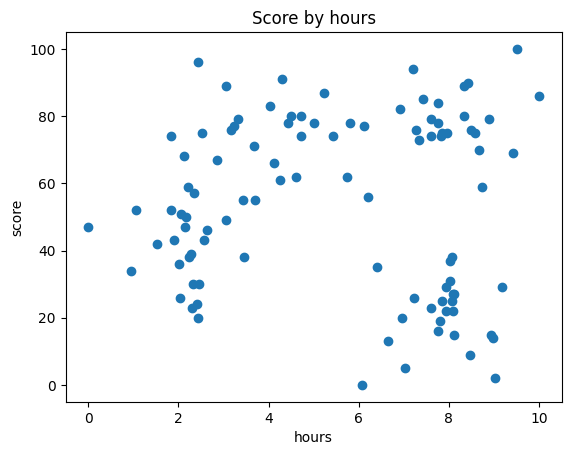

In [4]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)

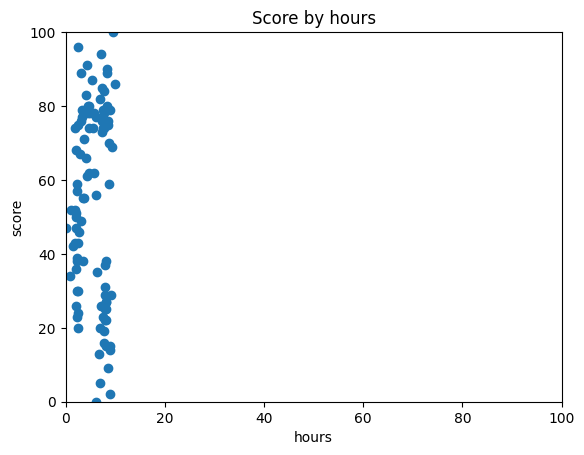

In [5]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.ylabel('score')
plt.show()

### 피처 스케일링 (Feature Scaling)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

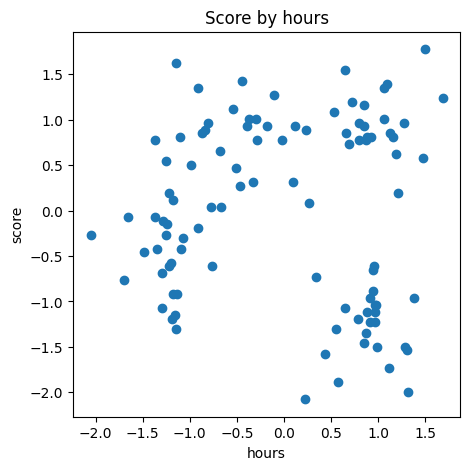

In [7]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## K-평균 실습 2

### 최적의 K 값 찾기 (엘보우 방식 Elbow Method)

In [8]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(X)

    # 각 지점으로부터 클러스터의 중심(centroid)까지의 거리의 제곱의 합
    inertia_list.append(kmeans.inertia_)

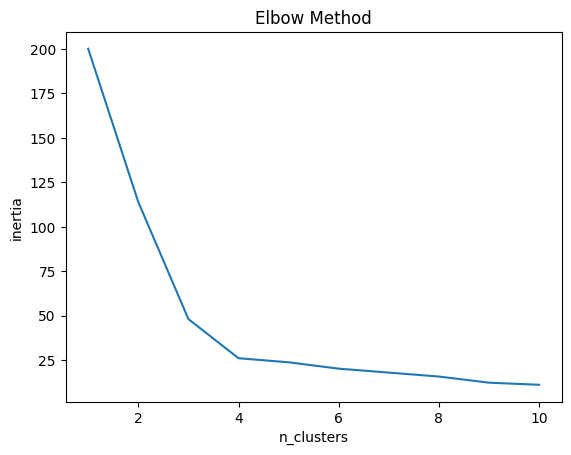

In [9]:
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [10]:
# 최적의 K 값
K = 4

## K-평균 실습 3

### 최적의 K (4) 값으로 KMeans 학습

In [11]:
kmeans = KMeans(n_clusters=K, random_state=0, n_init=10)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화 (최적의 K)

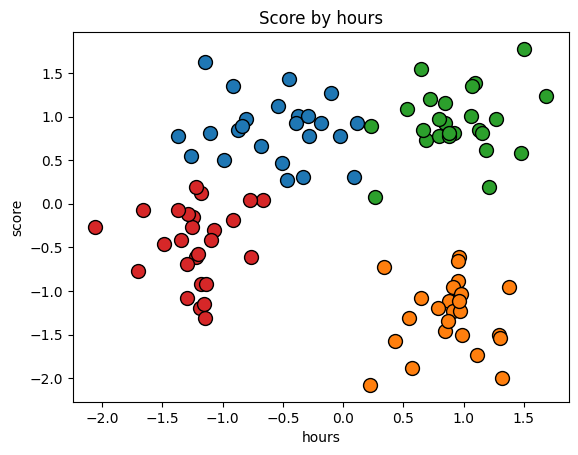

In [12]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolors='black')

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 중심점 표시

In [13]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

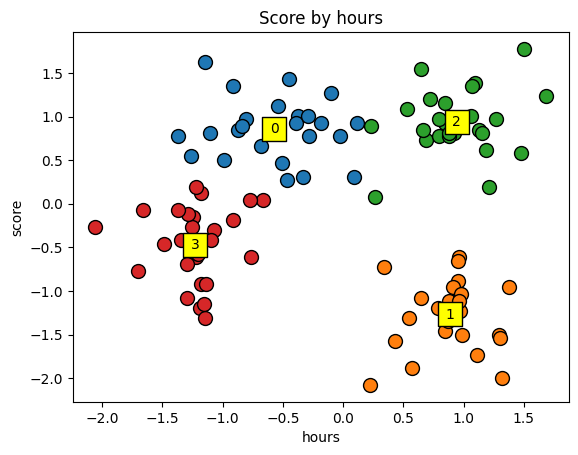

In [14]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolors='black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolors='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') # 클레서트 텍스트 출력

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()